copied from info here


https://cookbooks.projectpythia.org/radar-cookbook/notebooks/foundations/pyart-gridding.html

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 10000)


import altair as alt
alt.data_transformers.disable_max_rows()

import glob
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import act
import pyart

/Users/elischwat/miniconda3/envs/arm/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [5]:
# Explore files
radar = pyart.io.read('/Users/elischwat/Downloads/gucxprecipradarS2.00.20221030.000005.raw.nc/gucxprecipradarS2.00.20221030.000005.raw.csu.sail-20221030-000005_702875_22_326_RHI.nc')
print(radar.scan_type)

rhi


In [8]:

fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)
radar.fields.keys()

dict_keys(['DBZ', 'VEL', 'WIDTH', 'ZDR', 'PHIDP', 'RHOHV', 'NCP', 'SNR', 'DBZhv'])

<Figure size 1000x1000 with 0 Axes>

In [9]:



z_grid_limits = (0,15000)
y_grid_limits = (-20_000.,20_000.)
x_grid_limits = (-20_000.,20_000.)
grid_resolution = 500

def compute_number_of_points(extent, resolution):
    return int((extent[1] - extent[0])/resolution)

z_grid_points = compute_number_of_points(z_grid_limits, grid_resolution)
z_grid_points

30

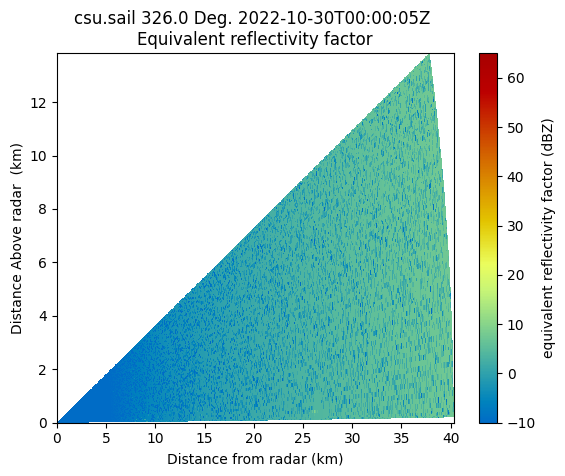

In [10]:
display.plot_rhi('DBZ')